# **Big Mart Sale Forecast**
##**Dự đoán doanh số bán hàng của từng sản phẩm tại một cửa hàng cụ thể**

## **1. Bối cảnh và Nội dung**

Trong thời đại cạnh tranh của ngành bán lẻ, việc dự đoán doanh số bán hàng có ý nghĩa quan trọng đối với chiến lược kinh doanh của các doanh nghiệp. BigMart, một hệ thống bán lẻ lớn, đã tiến hành thu thập dữ liệu bán hàng năm 2013 của 1559 sản phẩm trên 10 cửa hàng thuộc nhiều thành phố khác nhau. Đồng thời, các thuộc tính quan trọng của từng sản phẩm và cửa hàng cũng được ghi nhận nhằm xây dựng một mô hình dự báo doanh số.

Mục tiêu của mô hình này là giúp BigMart hiểu rõ hơn về các yếu tố ảnh hưởng đến doanh số bán hàng, từ đó tối ưu hóa hoạt động kinh doanh, quản lý kho hàng hiệu quả và cải thiện chiến lược bán lẻ.

Do dữ liệu thu thập có thể bị thiếu giá trị do lỗi kỹ thuật hoặc một số cửa hàng không báo cáo đầy đủ thông tin, quá trình xử lý dữ liệu đóng vai trò quan trọng trong việc đảm bảo chất lượng mô hình dự báo.

## **2. Đặc trưng dữ liệu**

- **Item_Identifier**: Mã sản phẩm duy nhất.
- **Item_Weight**: Trọng lượng của sản phẩm.
- **Item_Fat_Content**: Hàm lượng chất béo của sản phẩm.
- **Item_Visibility**: Tỷ lệ phần trăm tổng diện tích hiển thị của tất cả các sản phẩm trong một cửa hàng được phân bổ cho sản phẩm cụ thể.
- **Item_Type**: Danh mục sản phẩm.
- **Item_MRP**: Giá bán lẻ tối đa (giá niêm yết) của sản phẩm.
- **Outlet_Identifier**: Mã cửa hàng duy nhất.
- **Outlet_Establishment_Year**: Năm thành lập cửa hàng.
- **Outlet_Size**: Kích thước của cửa hàng theo diện tích mặt bằng.
- **Outlet_Location_Type**: Loại thành phố nơi cửa hàng tọa lạc.
- **Outlet_Type**: Loại hình cửa hàng (tạp hóa hoặc siêu thị).
- **Item_Outlet_Sales**: Doanh số bán sản phẩm tại cửa hàng cụ thể (biến mục tiêu cần dự đoán).

## **3. Ý tưởng nghiên cứu**

Đồ án được lấy ý tưởng từ cuộc thi *Store Sales - Time Series Forecasting* trên Kaggle. Dự án nhằm ứng dụng khoa học dữ liệu và học máy để dự đoán chính xác doanh số bán hàng của từng sản phẩm tại các cửa hàng BigMart.

## **4. Nguồn dữ liệu và tham khảo**

Tham khảo chi tiết tại: [Big Mart Sale Forecast on Kaggle](https://www.kaggle.com/code/chanchal24/big-mart-sale-forecast/notebook)

## 1. Phân tích và xử lý dữ liệu

### 1.1. Đọc dữ liệu và kiểm tra thông tin cơ bản

In [127]:
#Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")

In [128]:
# Đọc dữ liệu tập train
train_df = pd.read_csv("train.csv")
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [129]:
# Đọc dữ liệu tập test
test_df = pd.read_csv("test.csv")
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [130]:
#Kiểm tra kích thước bộ dữ liệu
print(train_df.shape)
print(test_df.shape)

(8522, 12)
(5681, 11)


In [131]:
#Kiểm tra giá trị Null
print(train_df.isnull().sum())
print("----------------------------------")
print(test_df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
----------------------------------
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


###1.2 Lọc dữ liệu theo cửa hàng cụ thể

In [132]:
# Hiển thị danh sách các cửa hàng
unique_values = train_df["Outlet_Identifier"].unique()
print("Danh sách cửa hàng", unique_values)

outlet_id = str(input("Nhập mã cửa hàng: "))

# Lọc dữ liệu theo mã cửa hàng
train_outlet = train_df[train_df["Outlet_Identifier"] == outlet_id]
test_outlet = test_df[test_df["Outlet_Identifier"] == outlet_id]

Danh sách cửa hàng ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Nhập mã cửa hàng: OUT049


### 1.3. Xử lý giá trị thiếu

In [133]:
# Xử lý giá trị thiếu
# Điền giá trị trung bình theo Item_Identifier cho Item_Weight
train_df['Item_Weight'] = train_df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
test_df['Item_Weight'] = test_df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

# Điền mode theo Outlet_Type cho Outlet_Size
size_mode = train_df.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode)
train_df['Outlet_Size'] = train_df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(size_mode[x.name]))
test_df['Outlet_Size'] = test_df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(size_mode[x.name]))

###1.4. Chuẩn hóa dữ liệu phân loại


In [135]:
# Chuẩn hóa Item_Fat_Content
fat_content_map = {"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"}
train_outlet["Item_Fat_Content"] = train_outlet["Item_Fat_Content"].replace(fat_content_map)
test_outlet["Item_Fat_Content"] = test_outlet["Item_Fat_Content"].replace(fat_content_map)

#Xử lý Item_Visibility bằng log transform
train_outlet["Item_Visibility"] = np.log1p(train_outlet["Item_Visibility"])
test_outlet["Item_Visibility"] = np.log1p(test_outlet["Item_Visibility"])

In [136]:
# Tạo đặc trưng mới: Price_Per_Unit
train_outlet["Price_Per_Unit"] = train_outlet["Item_MRP"] / (train_outlet["Item_Weight"] + 1e-5)
test_outlet["Price_Per_Unit"] = test_outlet["Item_MRP"] / (test_outlet["Item_Weight"] + 1e-5)

current_year = 2023
train_outlet["Outlet_Age"] = current_year - train_outlet["Outlet_Establishment_Year"]
test_outlet["Outlet_Age"] = current_year - test_outlet["Outlet_Establishment_Year"]

In [137]:
# Mã hóa các biến phân loại bằng Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

for col in categorical_cols:
    train_outlet[col] = label_encoder.fit_transform(train_outlet[col])
    test_outlet[col] = label_encoder.transform(test_outlet[col])

# One-Hot Encoding cho Item_Type
train_outlet = pd.get_dummies(train_outlet, columns=["Item_Type"])
test_outlet = pd.get_dummies(test_outlet, columns=["Item_Type"])

# Thêm phần align columns sau One-Hot Encoding
# Sau khi get_dummies cho cả train và test
train_outlet, test_outlet = train_outlet.align(test_outlet, join='left', axis=1, fill_value=0)

###1.5.  Chuẩn bị dữ liệu cho mô hình


In [138]:
# Loại bỏ các cột không cần thiết
drop_cols = ["Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"]
X_train = train_outlet.drop(drop_cols + ["Item_Outlet_Sales"], axis=1)
y_train = train_outlet["Item_Outlet_Sales"]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 1.6 Xây dựng và đánh giá mô hình


In [139]:
# Chia tập train thành train và validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [140]:
# Huấn luyện mô hình Random Forest
model_rf = RandomForestRegressor(n_estimators=220, max_depth=10, random_state=42, n_jobs=-1)
model_rf.fit(X_train_split, y_train_split)

# Dự đoán trên tập validation
y_pred_rf = model_rf.predict(X_val_split)

# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_val_split, y_pred_rf))
r2 = r2_score(y_val_split, y_pred_rf)
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

RMSE: 1066.83
R-squared: 0.37


In [141]:
# Huấn luyện mô hình Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Dự đoán trên tập validation (để đánh giá)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
y_pred_lr = model_lr.predict(X_val_split)

# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_val_split, y_pred_lr))
r2 = r2_score(y_val_split, y_pred_lr)
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

RMSE: 941.32
R-squared: 0.51


## **Đánh giá kết quả train từ 2 mô hình Random Forest và Linear Regression**



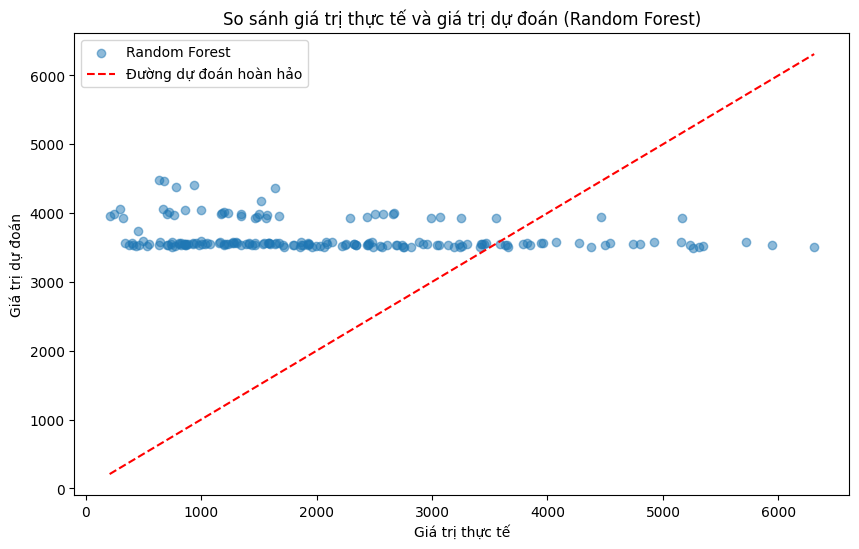

In [143]:
# Dữ liệu cho Random Forest
y_pred_rf = model_rf.predict(X_val_split) # Thay model_rf bằng mô hình Random Forest của bạn

# Vẽ biểu đồ cho Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_val_split, y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([min(y_val_split), max(y_val_split)], [min(y_val_split), max(y_val_split)], color='red', linestyle='--', label='Đường dự đoán hoàn hảo')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('So sánh giá trị thực tế và giá trị dự đoán (Random Forest)')
plt.legend()
plt.show()

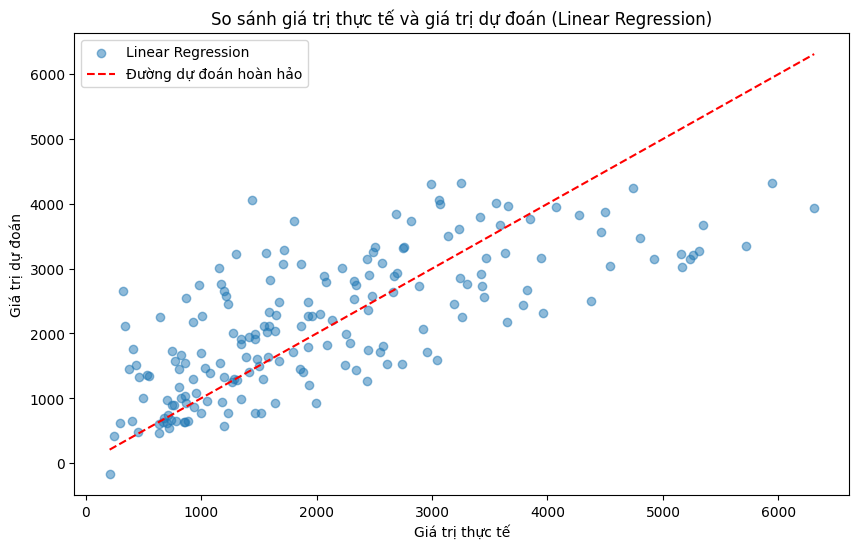

In [144]:
# Dữ liệu cho Linear Regression
y_pred_lr =model_lr.predict(X_val_split)

# Vẽ biểu đồ cho Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_val_split, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.plot([min(y_val_split), max(y_val_split)], [min(y_val_split), max(y_val_split)], color='red', linestyle='--', label='Đường dự đoán hoàn hảo')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('So sánh giá trị thực tế và giá trị dự đoán (Linear Regression)')
plt.legend()
plt.show()

### **Dựa trên hai biểu đồ so sánh giá trị thực tế với giá trị dự đoán của mô hình Random Forest và Linear Regression, ta có thể thấy được:**

**Random Forest:**

- Các điểm dữ liệu phân bố không tập trung xung quanh đường dự đoán (đường màu đỏ). Điều này cho thấy mô hình Random Forest chưa dự đoán tốt giá trị thực tế, dẫn đến sai số (RMSE) cao (1067.92) và R-squared thấp (0.37).

- Mô hình chỉ giải thích được 37% sự biến thiên của biến mục tiêu (doanh số bán hàng), cho thấy khả năng dự đoán còn hạn chế.

**Linear Regression:**

- Các điểm dữ liệu có xu hướng tập trung gần đường dự đoán hơn so với Random Forest. Có thể thấy được trong trường hợp này mô hình Linear Regression có khả năng dự đoán tốt hơn, với sai số (RMSE) thấp hơn (941.32) và R-squared cao hơn (0.51).
- Tuy nhiên, vẫn còn một số điểm dữ liệu nằm xa đường dự đoán hoàn hảo, chúng ta có thể thử nghiệm thêm các mô hình phức tạp hơn để tăng độ chính xác dự đoán







### 2. Dự đoán trên tập dữ liệu Test

### 2.1 Sử dụng Ramdom Forest

In [146]:
# Chuẩn bị dữ liệu test
X_test = test_outlet.drop(drop_cols + ["Item_Outlet_Sales"], axis=1)
X_test_scaled = scaler.transform(X_test)


model_rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
model_rf.fit(X_train_scaled, y_train)  # Huấn luyện lại mô hình với toàn bộ dữ liệu train
rf_predictions = model_rf.predict(X_test_scaled)

# Xuất kết quả cho Random Forest
result_rf_df = pd.DataFrame({
    "Item_Identifier": test_outlet["Item_Identifier"],
    "Outlet_Identifier": test_outlet["Outlet_Identifier"],
    "Item_Outlet_Sales_Prediction": rf_predictions})
result_rf_df.to_csv(f"sales_predictions_rf_{outlet_id}.csv", index=False)

print("Kết quả dự đoán doanh số bán hàng cho cửa hàng", outlet_id)
print("\nRandom Forest:")
print(tabulate(result_rf_df, headers="keys", tablefmt="pretty", showindex=False))

Kết quả dự đoán doanh số bán hàng cho cửa hàng OUT049

Random Forest:
+-----------------+-------------------+------------------------------+
| Item_Identifier | Outlet_Identifier | Item_Outlet_Sales_Prediction |
+-----------------+-------------------+------------------------------+
|      FDW58      |      OUT049       |      1921.2890405863259      |
|      FDU11      |      OUT049       |      1967.8624066904588      |
|      FDM24      |      OUT049       |      2273.362852461493       |
|      FDG02      |      OUT049       |      3221.6921166319207      |
|      NCX06      |      OUT049       |      3252.8302348242737      |
|      DRG49      |      OUT049       |      4461.3987865410245      |
|      FDM22      |      OUT049       |      834.2801843646281       |
|      FDC60      |      OUT049       |      951.0678061883792       |
|      DRI49      |      OUT049       |      1540.714322429976       |
|      FDR60      |      OUT049       |      1132.2747397681155      |
|      

###2.2 Sử dụng Linear Regression

In [125]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)  # Huấn luyện lại mô hình với toàn bộ dữ liệu train
lr_predictions = model_lr.predict(X_test_scaled)
# Xuất kết quả cho Linear Regression
result_lr_df = pd.DataFrame({
    "Item_Identifier": test_outlet["Item_Identifier"],
    "Outlet_Identifier": test_outlet["Outlet_Identifier"],
    "Item_Outlet_Sales_Prediction": lr_predictions})
result_lr_df.to_csv(f"sales_predictions_lr_{outlet_id}.csv", index=False)

print("Kết quả dự đoán doanh số bán hàng cho cửa hàng", outlet_id)
print("\nLinear Regression:")
print(tabulate(result_lr_df, headers="keys", tablefmt="pretty", showindex=False))

Kết quả dự đoán doanh số bán hàng cho cửa hàng OUT018

Linear Regression:
+-----------------+-------------------+------------------------------+
| Item_Identifier | Outlet_Identifier | Item_Outlet_Sales_Prediction |
+-----------------+-------------------+------------------------------+
|      FDL48      |      OUT018       |      394.92150743805337      |
|      DRC12      |      OUT018       |      -710.8840011823622      |
|      FDX51      |      OUT018       |      -626.1400837553471      |
|      NCR06      |      OUT018       |     -1591.8524368247897      |
|      NCD54      |      OUT018       |     -1012.8776868497978      |
|      NCL19      |      OUT018       |      -967.3273530857796      |
|      FDZ14      |      OUT018       |      -368.0949874759812      |
|      FDW21      |      OUT018       |     -1535.0606505787803      |
|      FDU35      |      OUT018       |      1327.4203024118654      |
|      FDA03      |      OUT018       |      -417.9858364950549      |
|  